In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as svm
%matplotlib inline
import pandas as pd
import csv
import numpy as np
from sklearn import preprocessing
import statistics
import sys

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# ds_content= pd.read_csv('/content/drive/MyDrive/steam_games.csv')

In [4]:
# ds_content.columns

In [5]:
# ds_collab = pd.read_csv('steam-200k.csv')
ds_collab = pd.read_csv('content_user_train.csv')

In [6]:
ds_collab.head(20)

,Unnamed: 0,user_id,game,hours,purchase,play
0,0.0,5250.0,Alien Swarm,4.9,1.0,1.0
1,1.0,5250.0,Cities Skylines,144.0,1.0,1.0
2,2.0,5250.0,Counter-Strike,0.0,1.0,0.0
3,3.0,5250.0,Counter-Strike Source,0.0,1.0,0.0
4,4.0,5250.0,Day of Defeat,0.0,1.0,0.0
5,5.0,5250.0,Deathmatch Classic,0.0,1.0,0.0
6,6.0,5250.0,Deus Ex Human Revolution,62.0,1.0,1.0
7,8.0,5250.0,Half-Life,0.0,1.0,0.0
8,9.0,5250.0,Half-Life 2,0.0,1.0,0.0
9,10.0,5250.0,Half-Life 2 Deathmatch,0.0,1.0,0.0


In [7]:
ds_collab.size

618258

In [8]:
#Preprocessing

In [9]:
ds_collab = ds_collab[ds_collab['play'] == 1].copy()

In [10]:
ds_collab['status'] = 'play'
ds_collab['name'] = ds_collab['game']
ds_collab = ds_collab.drop(columns=['play','purchase','Unnamed: 0','game'])

In [11]:
ds_collab.columns

Index(['user_id', 'hours', 'status', 'name'], dtype='object')

In [12]:
ds_collab.head(20)

,user_id,hours,status,name
0,5250.0,4.9,play,Alien Swarm
1,5250.0,144.0,play,Cities Skylines
6,5250.0,62.0,play,Deus Ex Human Revolution
15,5250.0,13.6,play,Portal 2
17,76767.0,13.1,play,Age of Empires II HD Edition
18,76767.0,0.8,play,Alien Swarm
22,76767.0,24.0,play,Banished
23,76767.0,22.0,play,Call of Duty Black Ops
24,76767.0,65.0,play,Call of Duty Modern Warfare 2
25,76767.0,165.0,play,Call of Duty Modern Warfare 2 - Multiplayer


In [13]:
hours_played_each_game = pd.DataFrame(index=ds_collab['user_id'].unique(), columns=ds_collab['name'].unique())


In [14]:
hours_played_each_game

,Alien Swarm,Cities Skylines,Deus Ex Human Revolution,Portal 2,Age of Empires II HD Edition,Banished,Call of Duty Black Ops,Call of Duty Modern Warfare 2,Call of Duty Modern Warfare 2 - Multiplayer,Call of Duty Modern Warfare 3,...,Cossacks European Wars,Operation Z,The Secret of Tremendous Corporation,Bloodwood Reload,Pink Heaven,Terrain Test,Electric Highways,Abducted,Pink Hour,SimpleRockets
5250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76767.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86540.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144736.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309434439.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309554670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309626088.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309824202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
hours_played_each_game['The Elder Scrolls V Skyrim'].index.values

array([5.25000000e+03, 7.67670000e+04, 8.65400000e+04, ...,
       3.09626088e+08, 3.09824202e+08, 3.09903146e+08])

In [16]:
for i in range(len(ds_collab)):
  user_id = ds_collab.iloc[i]['user_id']
  name = ds_collab.iloc[i]['name']
  hours_played_each_game.loc[user_id,name] = ds_collab.iloc[i]['hours']

In [17]:
hours_played_each_game

,Alien Swarm,Cities Skylines,Deus Ex Human Revolution,Portal 2,Age of Empires II HD Edition,Banished,Call of Duty Black Ops,Call of Duty Modern Warfare 2,Call of Duty Modern Warfare 2 - Multiplayer,Call of Duty Modern Warfare 3,...,Cossacks European Wars,Operation Z,The Secret of Tremendous Corporation,Bloodwood Reload,Pink Heaven,Terrain Test,Electric Highways,Abducted,Pink Hour,SimpleRockets
5250.0,4.9,144.0,62.0,13.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76767.0,0.8,NaN,NaN,15.0,13.1,24.0,22.0,65.0,165.0,15.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86540.0,NaN,NaN,NaN,NaN,0.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144736.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309434439.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309554670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309626088.0,NaN,NaN,NaN,NaN,6.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309824202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


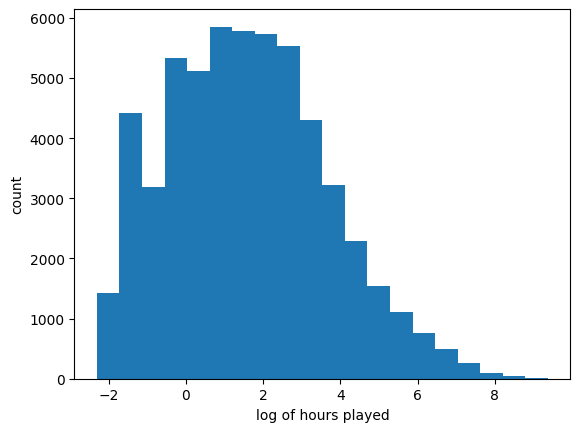

In [18]:
l = hours_played_each_game.values.flatten()
import math
h = []
for i in l:
  if math.isnan(i) == False:
    h.append(i)
plt.hist(np.log(h), bins=20)
plt.xlabel('log of hours played')
plt.ylabel('count')
plt.show()

In [19]:
hours_played_each_game.to_csv('each_game_playtime.csv')

In [37]:
each_item = pd.read_csv('each_game_playtime.csv', index_col=0)

In [42]:
each_item.index = list(int(i) for i in each_item.index)

In [43]:
each_item

,Alien Swarm,Cities Skylines,Deus Ex Human Revolution,Portal 2,Age of Empires II HD Edition,Banished,Call of Duty Black Ops,Call of Duty Modern Warfare 2,Call of Duty Modern Warfare 2 - Multiplayer,Call of Duty Modern Warfare 3,...,Cossacks European Wars,Operation Z,The Secret of Tremendous Corporation,Bloodwood Reload,Pink Heaven,Terrain Test,Electric Highways,Abducted,Pink Hour,SimpleRockets
5250,4.9,144.0,62.0,13.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76767,0.8,NaN,NaN,15.0,13.1,24.0,22.0,65.0,165.0,15.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86540,NaN,NaN,NaN,NaN,0.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309434439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309554670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309626088,NaN,NaN,NaN,NaN,6.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309824202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
each_item

,Alien Swarm,Cities Skylines,Deus Ex Human Revolution,Portal 2,Age of Empires II HD Edition,Banished,Call of Duty Black Ops,Call of Duty Modern Warfare 2,Call of Duty Modern Warfare 2 - Multiplayer,Call of Duty Modern Warfare 3,...,Cossacks European Wars,Operation Z,The Secret of Tremendous Corporation,Bloodwood Reload,Pink Heaven,Terrain Test,Electric Highways,Abducted,Pink Hour,SimpleRockets
5250,4.9,144.0,62.0,13.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76767,0.8,NaN,NaN,15.0,13.1,24.0,22.0,65.0,165.0,15.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86540,NaN,NaN,NaN,NaN,0.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
181212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309434439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309554670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309626088,NaN,NaN,NaN,NaN,6.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
309824202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
each_item_norm = np.log(each_item)
each_item_norm += abs(each_item_norm.min().min())
print(each_item_norm.min().min(), each_item_norm.max().max())
each_item_norm = each_item_norm[(~each_item_norm.isnull()).sum(axis=1) >= 3]
each_item_norm

0.0 11.674533980166641


,Alien Swarm,Cities Skylines,Deus Ex Human Revolution,Portal 2,Age of Empires II HD Edition,Banished,Call of Duty Black Ops,Call of Duty Modern Warfare 2,Call of Duty Modern Warfare 2 - Multiplayer,Call of Duty Modern Warfare 3,...,Cossacks European Wars,Operation Z,The Secret of Tremendous Corporation,Bloodwood Reload,Pink Heaven,Terrain Test,Electric Highways,Abducted,Pink Hour,SimpleRockets
5250,3.891820,7.272398,6.429719,4.912655,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76767,2.079442,NaN,NaN,5.010635,4.875197,5.480639,5.393628,6.476972,7.408531,5.068904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86540,NaN,NaN,NaN,NaN,1.945910,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229911,NaN,NaN,NaN,NaN,NaN,NaN,4.394449,6.086775,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298950,2.772589,2.995732,5.634790,5.141664,2.484907,1.791759,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306042038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306547522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306971738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
308695132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
each_item_norm = each_item_norm.fillna(0)

In [47]:
each_item_norm.columns

Index(['Alien Swarm', 'Cities Skylines', 'Deus Ex Human Revolution',
       'Portal 2', 'Age of Empires II HD Edition', 'Banished',
       'Call of Duty Black Ops', 'Call of Duty Modern Warfare 2',
       'Call of Duty Modern Warfare 2 - Multiplayer',
       'Call of Duty Modern Warfare 3',
       ...
       'Cossacks European Wars', 'Operation Z',
       'The Secret of Tremendous Corporation', 'Bloodwood Reload',
       'Pink Heaven', 'Terrain Test', 'Electric Highways', 'Abducted',
       'Pink Hour', 'SimpleRockets'],
      dtype='object', length=3363)

In [48]:
each_item_norm

,Alien Swarm,Cities Skylines,Deus Ex Human Revolution,Portal 2,Age of Empires II HD Edition,Banished,Call of Duty Black Ops,Call of Duty Modern Warfare 2,Call of Duty Modern Warfare 2 - Multiplayer,Call of Duty Modern Warfare 3,...,Cossacks European Wars,Operation Z,The Secret of Tremendous Corporation,Bloodwood Reload,Pink Heaven,Terrain Test,Electric Highways,Abducted,Pink Hour,SimpleRockets
5250,3.891820,7.272398,6.429719,4.912655,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76767,2.079442,0.000000,0.000000,5.010635,4.875197,5.480639,5.393628,6.476972,7.408531,5.068904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86540,0.000000,0.000000,0.000000,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
229911,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.394449,6.086775,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298950,2.772589,2.995732,5.634790,5.141664,2.484907,1.791759,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306042038,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306547522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306971738,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
308695132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
slice_ds = each_item_norm
slice_ds

,Alien Swarm,Cities Skylines,Deus Ex Human Revolution,Portal 2,Age of Empires II HD Edition,Banished,Call of Duty Black Ops,Call of Duty Modern Warfare 2,Call of Duty Modern Warfare 2 - Multiplayer,Call of Duty Modern Warfare 3,...,Cossacks European Wars,Operation Z,The Secret of Tremendous Corporation,Bloodwood Reload,Pink Heaven,Terrain Test,Electric Highways,Abducted,Pink Hour,SimpleRockets
5250,3.891820,7.272398,6.429719,4.912655,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76767,2.079442,0.000000,0.000000,5.010635,4.875197,5.480639,5.393628,6.476972,7.408531,5.068904,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86540,0.000000,0.000000,0.000000,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
229911,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.394449,6.086775,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
298950,2.772589,2.995732,5.634790,5.141664,2.484907,1.791759,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306042038,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306547522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306971738,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
308695132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
np_df = each_item_norm.to_numpy()

In [83]:
user_id = each_item_norm.index.to_numpy()

In [84]:
np_df

array([[3.8918203 , 7.27239839, 6.42971948, ..., 0.        , 0.        ,
        0.        ],
       [2.07944154, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [85]:
feature_arr = []
for i in np_df:
  d = list(i[0:len(i)-1])
  p = [int(j) for j in d]
  feature_arr.append(p)

In [86]:
user_id

array([     5250,     76767,     86540, ..., 306971738, 308695132,
       309404240], dtype=int64)

In [87]:
from sklearn.metrics import mean_squared_error
class ExplicitMF:
    """
    Train a matrix factorization model using Alternating Least Squares
    to predict empty entries in a matrix
    
    Parameters
    ----------
    n_iters : int
        number of iterations to train the algorithm
        
    n_factors : int
        number of latent factors to use in matrix 
        factorization model, some machine-learning libraries
        denote this as rank
        
    reg : float
        regularization term for item/user latent factors,
        since lambda is a keyword in python we use reg instead
    """

    def __init__(self, n_iters, n_factors, reg):
        self.reg = reg
        self.n_iters = n_iters
        self.n_factors = n_factors  
        
    def fit(self, train):
        """
        pass in training and testing at the same time to record
        model convergence, assuming both dataset is in the form
        of User x Item matrix with cells as ratings
        """
        self.n_user, self.n_item = train.shape
        self.user_factors = np.random.random((self.n_user, self.n_factors))
        self.item_factors = np.random.random((self.n_item, self.n_factors))

        self.train_mse_record = []   
        for _ in range(self.n_iters):
            self.user_factors = self._als_step(train, self.user_factors, self.item_factors)
            self.item_factors = self._als_step(train.T, self.item_factors, self.user_factors) 
            predictions = self.predict()
            train_mse = self.compute_mse(train, predictions)
            self.train_mse_record.append(train_mse)
        
        return self    
    
    def _als_step(self, ratings, solve_vecs, fixed_vecs):
        """
        when updating the user matrix,
        the item matrix is the fixed vector and vice versa
        """
        A = fixed_vecs.T.dot(fixed_vecs) + np.eye(self.n_factors) * self.reg
        b = ratings.dot(fixed_vecs)
        A_inv = np.linalg.inv(A)
        solve_vecs = b.dot(A_inv)
        return solve_vecs
    
    def predict(self):
        """predict ratings for every user and item"""
        pred = self.user_factors.dot(self.item_factors.T)
        return pred
    
    @staticmethod
    def compute_mse(y_true, y_pred):
        """ignore zero terms prior to comparing the mse"""
        mask = np.nonzero(y_true)
        mse = mean_squared_error(y_true[mask], y_pred[mask])
        return mse

In [88]:
def plot_learning_curve(model):
    """visualize the training/testing loss"""
    linewidth = 3
    plt.plot(model.train_mse_record, label = 'Train', linewidth = linewidth)
    plt.xlabel('iterations')
    plt.ylabel('MSE')
    plt.legend(loc = 'best')
    plt.show()

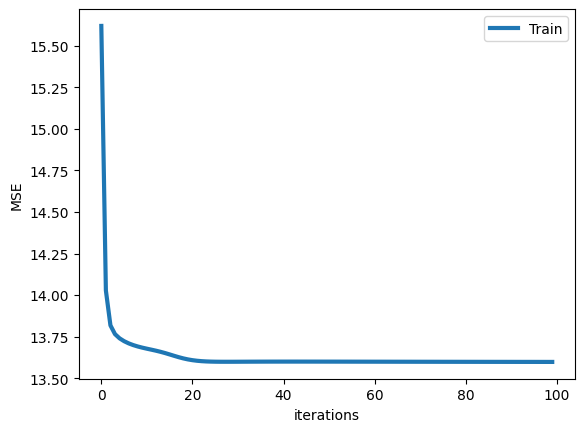

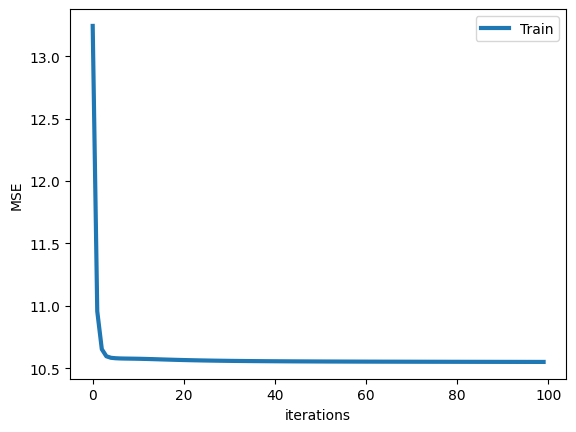

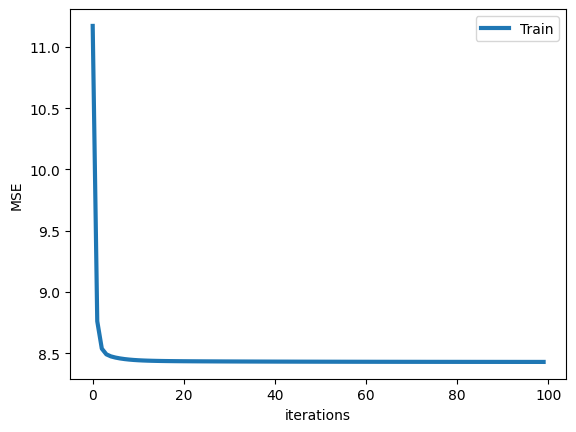

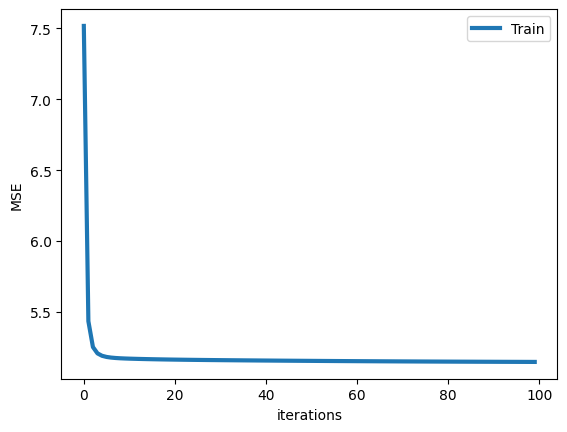

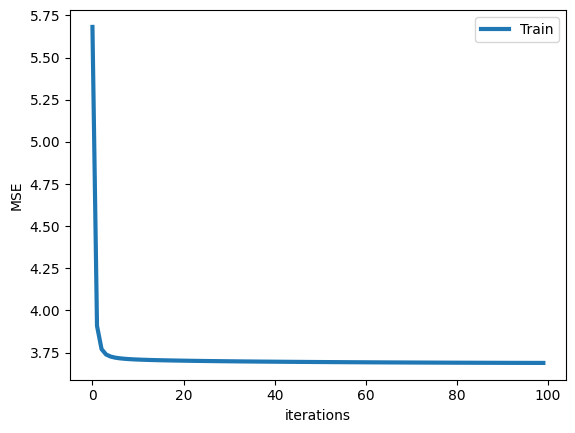

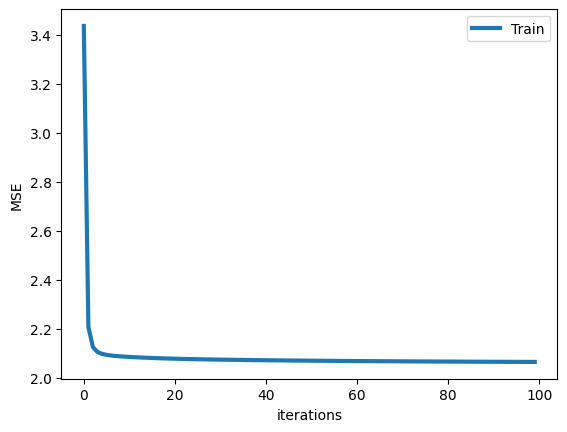

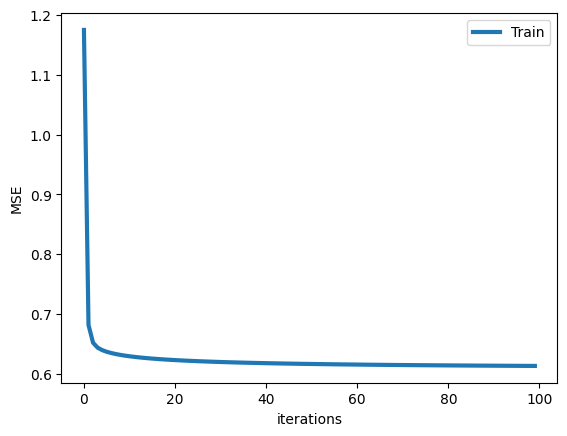

In [89]:
als_min_history = []
for i in [5,20,40,100,150,250,500]:
  als = ExplicitMF(n_iters = 100, n_factors = i, reg = 0.01)
  als.fit(slice_ds.to_numpy())
  plot_learning_curve(als)
  als_min_history.append(min(als.train_mse_record))

Text(0, 0.5, 'MSE')

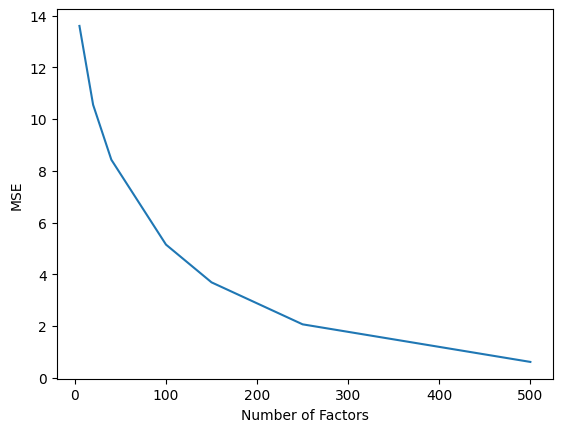

In [90]:
plt.plot([5,20,40,100,150,250,500], als_min_history)
plt.xlabel('Number of Factors')
plt.ylabel('MSE')

In [91]:
md = ExplicitMF(n_iters = 100, n_factors = 25, reg = 0.01)
md.fit(slice_ds.to_numpy())

In [92]:
lf_prod = np.matmul(md.user_factors, md.item_factors.T)

In [93]:
ubyi_mf = pd.DataFrame(lf_prod, index=slice_ds.index.values, columns=slice_ds.columns.values)
ubyi_mf

,Alien Swarm,Cities Skylines,Deus Ex Human Revolution,Portal 2,Age of Empires II HD Edition,Banished,Call of Duty Black Ops,Call of Duty Modern Warfare 2,Call of Duty Modern Warfare 2 - Multiplayer,Call of Duty Modern Warfare 3,...,Cossacks European Wars,Operation Z,The Secret of Tremendous Corporation,Bloodwood Reload,Pink Heaven,Terrain Test,Electric Highways,Abducted,Pink Hour,SimpleRockets
5250,0.152607,0.358855,0.331588,3.151531,0.173893,0.216343,0.230346,-0.056491,-0.158848,0.162063,...,0.000078,-0.000125,0.0,0.0,0.0,0.0,0.0,-0.000185,-2.251679e-05,0.0
76767,0.713975,0.182751,0.016458,3.318969,0.369774,0.432564,3.300357,5.185672,7.406152,2.812546,...,-0.000270,-0.000203,0.0,0.0,0.0,0.0,0.0,-0.000108,-1.644074e-04,0.0
86540,0.472376,0.051332,0.128571,0.825172,0.153346,0.010739,-0.054223,-0.081383,0.019237,-0.069438,...,-0.000372,-0.000107,0.0,0.0,0.0,0.0,0.0,-0.000142,-1.367389e-04,0.0
229911,0.276664,0.073111,0.179584,0.936845,-0.057299,0.163634,1.278438,2.369641,3.439116,0.769520,...,0.000094,-0.000169,0.0,0.0,0.0,0.0,0.0,0.000057,-1.943514e-04,0.0
298950,1.494003,2.523768,4.205275,5.009358,0.930143,0.989876,0.909848,-0.901668,-0.275848,-0.555061,...,-0.003217,-0.000581,0.0,0.0,0.0,0.0,0.0,0.000777,-9.519643e-04,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306042038,-0.036761,0.058065,0.012578,0.046795,-0.008979,0.020047,0.025233,-0.003666,-0.040721,-0.001564,...,0.000107,-0.000022,0.0,0.0,0.0,0.0,0.0,-0.000054,-3.654159e-05,0.0
306547522,0.018159,-0.020430,0.010708,-0.051242,-0.028264,-0.013083,-0.012675,-0.030514,-0.025356,0.012829,...,0.000020,0.000378,0.0,0.0,0.0,0.0,0.0,-0.000043,4.891872e-04,0.0
306971738,0.011656,-0.008408,0.028684,-0.094523,0.005266,0.000313,-0.003722,-0.013135,-0.021905,0.002995,...,-0.000025,-0.000003,0.0,0.0,0.0,0.0,0.0,0.000036,1.832200e-07,0.0
308695132,0.003904,-0.004832,0.000314,-0.033809,0.000133,-0.002248,-0.009412,-0.008232,-0.009337,-0.007734,...,0.000040,-0.000004,0.0,0.0,0.0,0.0,0.0,0.000006,-5.660503e-06,0.0


In [94]:
# ubyi_mf.loc[151603712].values
ubyi_mf.loc[5250].values

array([ 1.52607393e-01,  3.58855259e-01,  3.31588440e-01, ...,
       -1.85067180e-04, -2.25167908e-05,  0.00000000e+00])

In [97]:
#construct user correlation matrix
user_corr = pd.DataFrame(index=ubyi_mf.index.values, 
                         columns=ubyi_mf.index.values)

In [98]:
i = 0
for user1 in user_corr.index.values:
  #progress indicator
  i+=1
  print(i)
  # print("for-",user1)
  for user2 in user_corr.columns.values:
    if user1 == user2:
      continue
    # print()
    a = ubyi_mf.loc[user1].values
    b = ubyi_mf.loc[user2].values

    corr = np.corrcoef(a,b)[0,1]
    user_corr.loc[user1,user2] = corr
    user_corr.loc[user2,user1] = corr

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [99]:
user_corr

,5250,76767,86540,229911,298950,547685,554278,561758,622362,748719,...,303129589,303525289,303789064,304081461,304971849,306042038,306547522,306971738,308695132,309404240
5250,NaN,0.303966,0.270505,0.149043,0.42804,-0.02497,0.086995,0.521642,-0.008772,0.080827,...,0.220452,0.002882,-0.01375,0.082742,-0.056323,0.064589,-0.020366,-0.169485,-0.180329,0.064432
76767,0.303966,NaN,0.042917,0.534087,0.102353,0.349785,0.61333,0.515435,-0.033993,0.243864,...,0.152908,0.040406,-0.005469,0.005575,0.033504,-0.002935,-0.022426,-0.100665,-0.106075,-0.016108
86540,0.270505,0.042917,NaN,-0.018515,0.396786,-0.010366,0.254528,0.397493,0.010331,0.064559,...,0.092845,-0.101375,0.006996,-0.029283,0.133348,-0.034167,0.011723,-0.031608,0.071903,-0.00757
229911,0.149043,0.534087,-0.018515,NaN,0.051756,0.292921,0.348672,0.336554,0.645625,0.246727,...,0.046313,0.04096,-0.001778,0.000998,-0.06279,-0.014332,0.045846,0.09333,-0.007198,0.060506
298950,0.42804,0.102353,0.396786,0.051756,NaN,-0.001113,0.159257,0.222624,0.197879,0.373105,...,0.121203,-0.01296,0.039634,0.11991,0.082495,0.120722,0.134174,0.107119,0.097777,0.240427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306042038,0.064589,-0.002935,-0.034167,-0.014332,0.120722,0.019491,0.037004,-0.037401,-0.003831,-0.053714,...,-0.057099,0.608798,0.002313,0.993864,0.419142,NaN,0.069467,-0.078386,0.753731,0.831117
306547522,-0.020366,-0.022426,0.011723,0.045846,0.134174,-0.01183,0.019974,0.076418,0.290685,0.020161,...,-0.049468,0.114982,0.894387,0.051238,0.073516,0.069467,NaN,0.022664,0.174759,0.286859
306971738,-0.169485,-0.100665,-0.031608,0.09333,0.107119,0.023156,0.030474,0.248918,0.060726,-0.080442,...,0.163775,-0.095876,-0.016482,-0.087312,-0.383561,-0.078386,0.022664,NaN,-0.103486,-0.022037
308695132,-0.180329,-0.106075,0.071903,-0.007198,0.097777,0.054506,0.076725,-0.126834,0.119291,0.000184,...,-0.068913,0.774477,0.069941,0.711679,0.725934,0.753731,0.174759,-0.103486,NaN,0.642987


In [108]:
user_corr2 = user_corr
user_corr2.to_csv('users_corr_matrix.csv')

In [109]:
# m = list(user_corr.loc[151603712].values)
# m.sort()
# m = m[::-1]
# # d = user_corr.loc[151603712][for i in list(user_corr.loc[151603712].values): in m]
# d = list(user_corr.loc[151603712].values)
# d
# # print(m)
def similar_set(user):
    max = list(user_corr.loc[user].values)
    max.sort()
    max = max[::-1]
    d = user_corr.loc[user][user_corr.loc[user].values > max[5]].index.values
    print("Users similar with -",user," are ",d)
    


In [111]:
# similar_set(151603712)
# m = list(ubyi_mf.loc[151603712].values)
# m.sort()
# m = m[::-1]
# # m
# g = ubyi_mf.loc[151603712][ubyi_mf.loc[151603712].values > m[5]].index.values
# g
def top_game(user):
    m = list(ubyi_mf.loc[user].values)
    m.sort()
    m = m[::-1]
    # m
    g = list(ubyi_mf.loc[user][ubyi_mf.loc[user].values > m[10]].index.values)
    return g
def top_game_rec(user_list):
    h = []
    for i in user_list:
        d = set(h).union(set(top_game(i)))
        h = list(d)
    if len(h) >= 20:
        return h[0:20]
    return h
def recommend_game_20(user):
    max = list(user_corr.loc[user].values)
    max.sort()
    max = max[::-1]
    d = user_corr.loc[user][user_corr.loc[user].values > max[10]].index.values
    return top_game_rec(d)
    # print("Users similar with -",user," are ",d)

In [119]:
user = 76767
print("recommendation for user-",user,recommend_game_20(user))

recommendation for user- 76767 ['Fallout New Vegas', 'PAYDAY 2', 'Call of Duty Black Ops - Multiplayer', 'Call of Duty Modern Warfare 3', 'Call of Duty Ghosts - Multiplayer', 'Dota 2', 'Call of Duty Black Ops II - Zombies', 'Left 4 Dead', 'Counter-Strike Global Offensive', 'Call of Duty Black Ops II - Multiplayer', 'Battlefield Bad Company 2', 'Call of Duty Modern Warfare 3 - Multiplayer', 'Call of Duty Modern Warfare 2', 'The Elder Scrolls V Skyrim', 'Call of Duty Black Ops II', 'Portal 2', "Sid Meier's Civilization V", 'Counter-Strike Source', 'Call of Duty Advanced Warfare - Multiplayer', 'Call of Duty Modern Warfare 2 - Multiplayer']


C:\Users\DELL\AppData\Local\Temp\ipykernel_15960\2634080221.py:27: RuntimeWarning: invalid value encountered in greater
  d = user_corr.loc[user][user_corr.loc[user].values > max[10]].index.values


In [120]:
ds_total = pd.read_csv('content_user_test.csv')
ds_total

,Unnamed: 0,user_id,game,hours,purchase,play
0,39525,53898495,Magicka Nippon,0.0,1,0
1,93521,145908178,Counter-Strike Global Offensive,5.3,1,1
2,107043,180901075,Painkiller Black Edition,0.0,1,0
3,99216,158655873,Far Cry 3,6.9,1,1
4,78945,111419019,Counter-Strike Global Offensive,0.2,1,1
...,...,...,...,...,...,...
25756,22205,33013552,Beat Hazard,1.6,1,1
25757,31283,44321815,Torchlight II,18.5,1,1
25758,2630,4603800,Ricochet,0.0,1,0
25759,99927,160055758,Dota 2,2.5,1,1


In [121]:
m_l = recommend_game_20(user)
m_l

C:\Users\DELL\AppData\Local\Temp\ipykernel_15960\2634080221.py:27: RuntimeWarning: invalid value encountered in greater
  d = user_corr.loc[user][user_corr.loc[user].values > max[10]].index.values


['Fallout New Vegas',
 'PAYDAY 2',
 'Call of Duty Black Ops - Multiplayer',
 'Call of Duty Modern Warfare 3',
 'Call of Duty Ghosts - Multiplayer',
 'Dota 2',
 'Call of Duty Black Ops II - Zombies',
 'Left 4 Dead',
 'Counter-Strike Global Offensive',
 'Call of Duty Black Ops II - Multiplayer',
 'Battlefield Bad Company 2',
 'Call of Duty Modern Warfare 3 - Multiplayer',
 'Call of Duty Modern Warfare 2',
 'The Elder Scrolls V Skyrim',
 'Call of Duty Black Ops II',
 'Portal 2',
 "Sid Meier's Civilization V",
 'Counter-Strike Source',
 'Call of Duty Advanced Warfare - Multiplayer',
 'Call of Duty Modern Warfare 2 - Multiplayer']

In [122]:
l = set([])
for i in range(len(ds_total['user_id'])):
    if ds_total['user_id'][i] == user:
        l.add(ds_total['game'][i])
        # print(ds_total['name'][i])
    # print(i)
    # break

print(list(l))

['Call of Duty Black Ops - Multiplayer', 'Total War ATTILA', 'Team Fortress Classic', 'Thief Deadly Shadows', 'Counter-Strike']


In [123]:
game_in_both = []
game_only_recomm = []
for i in m_l:
    if i in l:
        game_in_both.append(i)
    else:
        game_only_recomm.append(i)
print(game_in_both)
print("new games recommended-",game_only_recomm)

['Call of Duty Black Ops - Multiplayer']
new games recommended- ['Fallout New Vegas', 'PAYDAY 2', 'Call of Duty Modern Warfare 3', 'Call of Duty Ghosts - Multiplayer', 'Dota 2', 'Call of Duty Black Ops II - Zombies', 'Left 4 Dead', 'Counter-Strike Global Offensive', 'Call of Duty Black Ops II - Multiplayer', 'Battlefield Bad Company 2', 'Call of Duty Modern Warfare 3 - Multiplayer', 'Call of Duty Modern Warfare 2', 'The Elder Scrolls V Skyrim', 'Call of Duty Black Ops II', 'Portal 2', "Sid Meier's Civilization V", 'Counter-Strike Source', 'Call of Duty Advanced Warfare - Multiplayer', 'Call of Duty Modern Warfare 2 - Multiplayer']


In [124]:
print(len(game_in_both)/len(l))

0.2


In [125]:
dict = {}
for user in user_corr.index:
    dict[user] = recommend_game_20(user)

C:\Users\DELL\AppData\Local\Temp\ipykernel_15960\2634080221.py:27: RuntimeWarning: invalid value encountered in greater
  d = user_corr.loc[user][user_corr.loc[user].values > max[10]].index.values


In [126]:
dict

{5250: ['Unturned',
  'PAYDAY 2',
  'Call of Duty Modern Warfare 3',
  'ARK Survival Evolved',
  'Half-Life',
  'Half-Life 2 Episode One',
  'Rocket League',
  'Cities Skylines',
  "Don't Starve",
  'Torchlight II',
  'Half-Life 2 Episode Two',
  'Deus Ex Human Revolution',
  'The Stanley Parable',
  'Call of Duty Black Ops II - Multiplayer',
  'Left 4 Dead 2',
  'BioShock Infinite',
  "Sid Meier's Civilization V",
  'Portal 2',
  'Grand Theft Auto V',
  'Portal'],
 76767: ['Fallout New Vegas',
  'PAYDAY 2',
  'Call of Duty Black Ops - Multiplayer',
  'Call of Duty Modern Warfare 3',
  'Call of Duty Ghosts - Multiplayer',
  'Dota 2',
  'Call of Duty Black Ops II - Zombies',
  'Left 4 Dead',
  'Counter-Strike Global Offensive',
  'Call of Duty Black Ops II - Multiplayer',
  'Battlefield Bad Company 2',
  'Call of Duty Modern Warfare 3 - Multiplayer',
  'Call of Duty Modern Warfare 2',
  'The Elder Scrolls V Skyrim',
  'Call of Duty Black Ops II',
  'Portal 2',
  "Sid Meier's Civilizatio

In [127]:
us = pd.read_csv('users_corr_matrix.csv')
us

,Unnamed: 0,5250,76767,86540,229911,298950,547685,554278,561758,622362,...,303129589,303525289,303789064,304081461,304971849,306042038,306547522,306971738,308695132,309404240
0,5250,NaN,0.303966,0.270505,0.149043,0.428040,-0.024970,0.086995,0.521642,-0.008772,...,0.220452,0.002882,-0.013750,0.082742,-0.056323,0.064589,-0.020366,-0.169485,-0.180329,0.064432
1,76767,0.303966,NaN,0.042917,0.534087,0.102353,0.349785,0.613330,0.515435,-0.033993,...,0.152908,0.040406,-0.005469,0.005575,0.033504,-0.002935,-0.022426,-0.100665,-0.106075,-0.016108
2,86540,0.270505,0.042917,NaN,-0.018515,0.396786,-0.010366,0.254528,0.397493,0.010331,...,0.092845,-0.101375,0.006996,-0.029283,0.133348,-0.034167,0.011723,-0.031608,0.071903,-0.007570
3,229911,0.149043,0.534087,-0.018515,NaN,0.051756,0.292921,0.348672,0.336554,0.645625,...,0.046313,0.040960,-0.001778,0.000998,-0.062790,-0.014332,0.045846,0.093330,-0.007198,0.060506
4,298950,0.428040,0.102353,0.396786,0.051756,NaN,-0.001113,0.159257,0.222624,0.197879,...,0.121203,-0.012960,0.039634,0.119910,0.082495,0.120722,0.134174,0.107119,0.097777,0.240427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,306042038,0.064589,-0.002935,-0.034167,-0.014332,0.120722,0.019491,0.037004,-0.037401,-0.003831,...,-0.057099,0.608798,0.002313,0.993864,0.419142,NaN,0.069467,-0.078386,0.753731,0.831117
3059,306547522,-0.020366,-0.022426,0.011723,0.045846,0.134174,-0.011830,0.019974,0.076418,0.290685,...,-0.049468,0.114982,0.894387,0.051238,0.073516,0.069467,NaN,0.022664,0.174759,0.286859
3060,306971738,-0.169485,-0.100665,-0.031608,0.093330,0.107119,0.023156,0.030474,0.248918,0.060726,...,0.163775,-0.095876,-0.016482,-0.087312,-0.383561,-0.078386,0.022664,NaN,-0.103486,-0.022037
3061,308695132,-0.180329,-0.106075,0.071903,-0.007198,0.097777,0.054506,0.076725,-0.126834,0.119291,...,-0.068913,0.774477,0.069941,0.711679,0.725934,0.753731,0.174759,-0.103486,NaN,0.642987
